# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Santiago de Cali, Departamento del Valle del Cauca, Colombia**, or **Colombia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Santiago de Cali, Departamento del Valle del Cauca, Colombia** to Ann Arbor, USA. In that case at least one source file must be about **Santiago de Cali, Departamento del Valle del Cauca, Colombia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Santiago de Cali, Departamento del Valle del Cauca, Colombia** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
import os.path

%matplotlib Widget

# DOWNLOAD AQ INFO OF PM2.5 ON EACH STATE

In [7]:

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", app_token = 'zUE6l2zKqdcZaWGvEvluVVk9L', username = "martin.dominguez.duran@gmail.com", password  = "Deporcali88")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")




# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
lista_dep = ['Amazonas',
             'Antioquia',
             'Arauca',
             'Atlántico',
             'Bolívar',
             'Boyacá',
             'Caldas',
             'Caquetá',
             'Casanare',
             'Cauca',
             'Cesar',
             'Chocó',
             'Córdoba',
             'Cundinamarca',
             'Guainía',
             'Guaviare',
             'Huila',
             'La Guajira',
             'Magdalena',
             'Meta',
             'Nariño',
             'Norte de Santander',
             'Putumayo','Quindío',
             'Risaralda',
             'San Andrés y Providencia',
             'Santander',
             'Sucre',
             'Tolima',
             'Valle del Cauca',
             'Vaupés',
             'Vichada',
             'Bogotá D.C.']

k = 0

for i in lista_dep:
    results = client.get('ysq6-ri4e', departamento=i.upper(), variable = 'PM2.5' , limit = 1000000)
    k+=1
    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)
    
    if len(results_df) > 0:
        # RAW DATA
        results_df.to_csv('data/'+i.upper()+'.csv')
        
        # MEDIA DE CADA MUNICIPIO
        results_df.fecha = pd.to_datetime(results_df.fecha)
        results_df.concentraci_n = pd.to_numeric(results_df.concentraci_n)
        
        results_df['Agno'] = results_df.apply(lambda df : df.fecha.year, axis=1)

        results_df = results_df.groupby(['nombre_del_municipio','Agno']).mean()
        results_df.to_csv('data/mean'+i.upper()+'.csv')

# DOWNLOAD COVID-19 INFO

In [5]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("gt2j-8ykr", limit=200000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
# client = Socrata("www.datos.gov.co", app_token = 'zUE6l2zKqdcZaWGvEvluVVk9L', username = "martin.dominguez.duran@gmail.com", password  = "Deporcali88")
        
# results = client.get('gt2j-8ykr', limit = 1000000)
# COVID_Colombia = pd.DataFrame.from_records(results)
results_df.to_csv('data/COV_COLOMBIA.csv')

# READ THE DATA DOWNLOADED

In [3]:
lista_dep = ['Amazonas',
             'Antioquia',
             'Arauca',
             'Atlántico',
             'Bolívar',
             'Boyacá',
             'Caldas',
             'Caquetá',
             'Casanare',
             'Cauca',
             'Cesar',
             'Chocó',
             'Córdoba',
             'Cundinamarca',
             'Guainía',
             'Guaviare',
             'Huila',
             'La Guajira',
             'Magdalena',
             'Meta',
             'Nariño',
             'Norte de Santander',
             'Putumayo','Quindío',
             'Risaralda',
             'San Andrés y Providencia',
             'Santander',
             'Sucre',
             'Tolima',
             'Valle del Cauca',
             'Vaupés',
             'Vichada',
             'Bogotá D.C.']

# Airquqlity data
AQ = pd.DataFrame([])
for i in lista_dep:
    if os.path.isfile('data/mean'+i.upper()+'.csv'):
        datos = pd.read_csv('data/mean'+i.upper()+'.csv')
        AQ = AQ.append(datos)
AQ = AQ[AQ['concentraci_n']>1]
AQ

,nombre_del_municipio,Agno,concentraci_n
0,ARAUCA,2017,13.113333
1,BARRANQUILLA,2017,11.495372
2,BARRANQUILLA,2018,13.090383
3,MALAMBO,2017,15.854231
4,MALAMBO,2018,19.069226
...,...,...,...
11,YUMBO,2014,25.656190
12,YUMBO,2015,23.981765
13,YUMBO,2016,27.136390
14,YUMBO,2017,30.024878


In [4]:
# Airquqlity data
COV = pd.read_csv('data/COV_COLOMBIA.csv')
COV['ciudad_de_ubicaci_n'] = COV.apply(lambda df: df['ciudad_de_ubicaci_n'].upper(), axis=1)
COV

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,c_digo_pa_s,fecha_de_muerte
0,0,1,2020-03-02T00:00:00.000,11001,BOGOTÁ D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,380.0,NaN
1,1,2,2020-03-06T00:00:00.000,76111,GUADALAJARA DE BUGA,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,724.0,NaN
2,2,3,2020-03-07T00:00:00.000,5001,MEDELLÍN,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,724.0,NaN
3,3,4,2020-03-09T00:00:00.000,5001,MEDELLÍN,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,NaN,NaN
4,4,5,2020-03-09T00:00:00.000,5001,MEDELLÍN,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,45207,45248,2020-06-08T00:00:00.000,76892,YUMBO,Valle del Cauca,Casa,42,F,En estudio,Leve,NaN,2020-06-08T00:00:00.000,2020-06-11T00:00:00.000,NaN,2020-06-11T00:00:00.000,NaN,NaN,NaN
45208,45208,45249,2020-06-08T00:00:00.000,76001,CALI,Valle del Cauca,Hospital,81,M,En estudio,Moderado,NaN,2020-06-04T00:00:00.000,2020-06-11T00:00:00.000,NaN,2020-06-11T00:00:00.000,NaN,NaN,NaN
45209,45209,45250,2020-06-08T00:00:00.000,8573,PUERTO COLOMBIA,Atlántico,Casa,10,F,En estudio,Leve,NaN,2020-06-03T00:00:00.000,2020-06-11T00:00:00.000,NaN,2020-06-11T00:00:00.000,NaN,NaN,NaN
45210,45210,45251,2020-06-08T00:00:00.000,8573,PUERTO COLOMBIA,Atlántico,Casa,34,M,En estudio,Leve,NaN,2020-06-06T00:00:00.000,2020-06-11T00:00:00.000,NaN,2020-06-11T00:00:00.000,NaN,NaN,NaN


In [367]:
# Calculo de mortalidad para cada municipio con info de AQ

M = []
C = []
Mort = []
PM = []
for i in AQ['nombre_del_municipio'].unique():
    muertes = len(COV[COV['ciudad_de_ubicaci_n']==i]) - sum(COV[COV['ciudad_de_ubicaci_n']==i]['fecha_de_muerte'].isna())
    casos = len(COV[COV['ciudad_de_ubicaci_n']==i])
    pm = AQ[AQ['nombre_del_municipio'] == i].mean()['concentraci_n']
    M.append(muertes)
    C.append(casos)
    PM.append(pm)
    if casos == 0:
        mortalidad=0
    else:
        mortalidad = muertes/casos
    Mort.append(mortalidad)

In [368]:
PM_COV = pd.DataFrame([AQ['nombre_del_municipio'].unique(),np.array(M),np.array(C),np.array(Mort),np.array(PM)]).T
PM_COV.columns = ['City','Deaths','Cases','Mortality_COVID','PM2.5_mean_11-18']

# TO-numeric
PM_COV.Deaths = pd.to_numeric(PM_COV.Deaths)
PM_COV.Cases = pd.to_numeric(PM_COV.Cases)
PM_COV.Mortality_COVID = pd.to_numeric(PM_COV.Mortality_COVID)
PM_COV['PM2.5_mean_11-18'] = pd.to_numeric(PM_COV['PM2.5_mean_11-18'])

PM_COV['Incumple_2020'] = PM_COV['PM2.5_mean_11-18']>25
PM_COV['Incumple_2030'] = PM_COV['PM2.5_mean_11-18']>15
PM_COV['Incumple_WHO'] = PM_COV['PM2.5_mean_11-18']>10
PM_COV.groupby('Incumple_WHO').sum()

,Deaths,Cases,Mortality_COVID,PM2.5_mean_11-18,Incumple_2020,Incumple_2030
Incumple_WHO,,,,,,
False,15,307,0.547792,31.143851,0.0,0.0
True,750,17903,1.719652,685.188026,3.0,25.0


In [369]:
PM_COV.groupby('Incumple_2020').mean()

,Deaths,Cases,Mortality_COVID,PM2.5_mean_11-18,Incumple_2030,Incumple_WHO
Incumple_2020,,,,,,
False,14.195122,335.365854,0.053319,15.511974,0.536585,0.902439
True,61.000000,1486.666667,0.027125,26.780310,1.000000,1.000000


In [370]:
PM_COV.groupby('Incumple_2030').mean()

,Deaths,Cases,Mortality_COVID,PM2.5_mean_11-18,Incumple_2020,Incumple_WHO
Incumple_2030,,,,,,
False,14.578947,311.315789,0.062968,12.000847,0.00,0.789474
True,19.520000,491.800000,0.042842,19.532632,0.12,1.000000


In [375]:
import matplotlib.gridspec as gridspec

maxD = PM_COV['Deaths'].sum()

gspec = gridspec.GridSpec(12, 12)

plt.figure(figsize=(8,8))

Muertes = plt.subplot(gspec[:4, 6:])
Muertes.bar(x =['Yes','No'], height = PM_COV.groupby('Incumple_2030').sum()['Deaths'] , color=['darkgreen','darkred'])
plt.xticks(rotation=0,fontsize= 7)
plt.title("Compliance of\nRes. 2254 for 2030", fontsize=9)
plt.tick_params(labelleft=False)
plt.ylim((0,maxD))

Muertes = plt.subplot(gspec[:4, :6])
Muertes.bar(x =['Yes','No'], height = PM_COV.groupby('Incumple_WHO').sum()['Deaths'] , color=['darkgreen','darkred'])
plt.xticks(rotation=0,fontsize= 7)
plt.title("Compliance of standard\nrecommended by WHO", fontsize=9)
plt.ylabel('Deaths')
plt.ylim((0,maxD))

PM = plt.subplot(gspec[5:10, 0:11])
plt.axhline(y = 15,c='k', ls='--')
PM.bar(x = PM_COV.City, height = PM_COV['PM2.5_mean_11-18'],color='darkblue')
plt.xticks(rotation=90,fontsize= 7)
plt.ylabel('PM 2.5 anually mean concentration')
plt.axhline(y = 10,c='k', ls='--')
plt.text('ARAUCA',15, 'RES. 254',fontsize=6, bbox=dict(fc="gray"))
plt.text('ARAUCA',10, 'WHO',fontsize=6, bbox=dict(fc="gray"))
plt.xlabel('Colombian cities')

plt.suptitle('Historical PM 2.5 compliance of standards correlated\nwith number of deaths in Colombian cities', fontweight='bold')


def onclick(event):
    plt.clf()
    
    Muertes = plt.subplot(gspec[1:4, 4:8])
    Muertes.bar(x =['Yes','No'], height = PM_COV.groupby('Incumple_2030').sum()['Deaths'] , color=['darkgreen','darkred'])
    plt.xticks(rotation=0,fontsize= 7)
    plt.title("Compliance of\nRes. 2254 for 2030", fontsize=9)
    plt.ylim((0,maxD))
    plt.tick_params(labelleft = False)
    
    Muertes = plt.subplot(gspec[1:4, :4])
    Muertes.bar(x =['Yes','No'], height = PM_COV.groupby('Incumple_WHO').sum()['Deaths'] , color=['darkgreen','darkred'])
    plt.xticks(rotation=0,fontsize= 7)
    plt.title("Compliance of standard\nrecommended by WHO", fontsize=9)
    plt.ylim((0,maxD))
    plt.ylabel('Deaths')

    
    Muertes = plt.subplot(gspec[1:4, 8:])
    PM_COV['temp'] = PM_COV['PM2.5_mean_11-18'] > event.ydata
    Muertes.bar(x =['Yes','No'], height = PM_COV.groupby('temp').sum()['Deaths'] , color=['darkgreen','darkred'])
    plt.xticks(rotation=0,fontsize= 7)
    plt.title("Compliance of standard\nselected by you (< "+str(round(event.ydata,1))+")", fontsize=9)
    plt.ylim((0,maxD))
    plt.tick_params(labelleft = False)
    
    
    PM = plt.subplot(gspec[5:10, 0:11])
    
    means = PM_COV['PM2.5_mean_11-18']
    X = PM_COV.City
    
    cmap = plt.get_cmap('RdYlGn')
    colors = cmap((means-event.ydata)/event.ydata + 0.5)
    
    for i in range(len(X)):
        plt.bar(X[i], means[i],color=colors[i])
        
    plt.ylabel('PM 2.5 anually mean concentration')
    plt.xlabel('Colombian cities')
    
    plt.axhline(y = event.ydata, c='darkblue', ls='--', zorder=4)
    plt.text('CALI',event.ydata, 'Your standard',fontsize=6, bbox=dict(fc="lightblue"), zorder=5)
    
    plt.xticks(rotation=90,fontsize= 7)
    plt.axhline(y = 15,c='k', ls='--')
    plt.text('ARAUCA',15, 'RES. 254',fontsize=6, bbox=dict(fc="lightgray"))
    plt.axhline(y = 10,c='k', ls='--')
    plt.text('ARAUCA',10, 'WHO',fontsize=6, bbox=dict(fc="lightgray"))
    
    ax2 = plt.subplot(gspec[5:,11])
    
    
    x = np.ones(1000)
    y = np.linspace(0,1,1000)
    
    plt.scatter(x,y,c=cmap(y), marker = 's')
    
    plt.tick_params(bottom = False, labelbottom = False)
    plt.ylabel('Probability of being above\nstandard selected')
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
    plt.suptitle('Historical PM 2.5 compliance of standards correlated\nwith number of deaths in Colombian cities', fontweight='bold')
    
        
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

7

In [166]:
VALLE = pd.read_csv('data/VALLE DEL CAUCA.csv')
VALLE

C:\Users\mdomi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,fecha,autoridad_ambiental,nombre_de_la_estaci_n,tecnolog_a,latitud,longitud,c_digo_del_departamento,departamento,c_digo_del_municipio,nombre_del_municipio,tipo_de_estaci_n,tiempo_de_exposici_n,variable,unidades,concentraci_n,geocoded_column
0,0,01/06/2017 12:00:00 a. m.,CVC,Jamundí,Automática,3.257067,-76.544250,76,VALLE DEL CAUCA,76364,JAMUNDÍ,Fija,1,PM2.5,µg/m3,17.4667,"{'latitude': '3.257067', 'longitude': '-76.544..."
1,1,01/06/2017 01:00:00 a. m.,CVC,Jamundí,Automática,3.257067,-76.544250,76,VALLE DEL CAUCA,76364,JAMUNDÍ,Fija,1,PM2.5,µg/m3,12.4868,"{'latitude': '3.257067', 'longitude': '-76.544..."
2,2,01/06/2017 02:00:00 a. m.,CVC,Jamundí,Automática,3.257067,-76.544250,76,VALLE DEL CAUCA,76364,JAMUNDÍ,Fija,1,PM2.5,µg/m3,40.2757,"{'latitude': '3.257067', 'longitude': '-76.544..."
3,3,01/06/2017 03:00:00 a. m.,CVC,Jamundí,Automática,3.257067,-76.544250,76,VALLE DEL CAUCA,76364,JAMUNDÍ,Fija,1,PM2.5,µg/m3,53.8184,"{'latitude': '3.257067', 'longitude': '-76.544..."
4,4,01/06/2017 04:00:00 a. m.,CVC,Jamundí,Automática,3.257067,-76.544250,76,VALLE DEL CAUCA,76364,JAMUNDÍ,Fija,1,PM2.5,µg/m3,51.6417,"{'latitude': '3.257067', 'longitude': '-76.544..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140101,140101,27/12/2018 00:00,DAGMA,Universidad del Valle,NaN,3.377911,-76.533811,76,VALLE DEL CAUCA,76001,CALI,Fija,24,PM2.5,ugm3,24.9200,"{'latitude': '3.377911', 'longitude': '-76.533..."
140102,140102,28/12/2018 00:00,DAGMA,Universidad del Valle,NaN,3.377911,-76.533811,76,VALLE DEL CAUCA,76001,CALI,Fija,24,PM2.5,ugm3,24.2900,"{'latitude': '3.377911', 'longitude': '-76.533..."
140103,140103,29/12/2018 00:00,DAGMA,Universidad del Valle,NaN,3.377911,-76.533811,76,VALLE DEL CAUCA,76001,CALI,Fija,24,PM2.5,ugm3,21.8300,"{'latitude': '3.377911', 'longitude': '-76.533..."
140104,140104,30/12/2018 00:00,DAGMA,Universidad del Valle,NaN,3.377911,-76.533811,76,VALLE DEL CAUCA,76001,CALI,Fija,24,PM2.5,ugm3,24.0000,"{'latitude': '3.377911', 'longitude': '-76.533..."


In [167]:
VALLE.fecha= pd.to_datetime(VALLE.fecha)

In [168]:
VALLE['DIA'] = VALLE.apply(lambda df : datetime.datetime(df.fecha.year,df.fecha.month,df.fecha.day), axis=1)

In [183]:
VALLEMX = VALLE[VALLE.fecha.dt.year >= 2013].dropna().groupby('DIA').mean().reset_index()
VALLEMX = VALLEMX[VALLEMX.concentraci_n > 35]

VALLEMN = VALLE.groupby('DIA').mean().reset_index()
VALLEMN = VALLEMN[VALLEMN.DIA.dt.year >= 2013]

plt.figure()

plt.stem(VALLEMX['DIA'], VALLEMX['concentraci_n'], linefmt = 'k', markerfmt='ro')

for i in range(len(VALLEMX['DIA'])):
    plt.text(VALLEMX['DIA'].iloc[i], VALLEMX['concentraci_n'].iloc[i], str(VALLEMX['DIA'].iloc[i]), rotation=45, fontsize = 6)
    
plt.plot(VALLEMN['DIA'], VALLEMN['concentraci_n'], c='darkred', zorder=-1)

C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


In [47]:
AQ_Col_Mean = pd.DataFrame([])

for i in lista_dep:
    if os.path.isfile('data/'+i.upper()+'.csv'):
        Depto = pd.read_csv('data/'+i.upper()+'.csv')
        Depto = Depto.groupby(['nombre_de_la_estaci_n','nombre_del_municipio']).mean().reset_index()
        AQ_Col_Mean = AQ_Col_Mean.append(Depto)

C:\Users\mdomi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
AQ_Col_Mean.to_csv('data/CalidadAirePM25Colombia.csv')

In [130]:
COVID_Colombia = pd.read_csv('data/COV_COLOMBIA.csv')
COVID_Colombia.fecha_de_notificaci_n = COVID_Colombia.apply(lambda df : df.fecha_de_notificaci_n[:10], axis=1)
COVID_Colombia.fecha_de_notificaci_n = pd.to_datetime(COVID_Colombia.fecha_de_notificaci_n)

In [131]:
COV = COVID_Colombia.groupby('fecha_de_notificaci_n').count().reset_index()

In [132]:
COV.plot('fecha_de_notificaci_n', 'id_de_caso')

C:\Users\mdomi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [133]:
COVID_Colombia.fecha_diagnostico = COVID_Colombia.apply(lambda df : df.fecha_diagnostico[:10], axis=1)
COVID_Colombia.replace('SIN DATO', np.nan, inplace=True)
COVID_Colombia.fecha_diagnostico = pd.to_datetime(COVID_Colombia.fecha_diagnostico)

In [134]:
plt.figure()
ax = plt.axes()
ax.plot(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'], COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_de_muerte'], c='b')
plt.ylabel('Muertes',c='b')
plt.tick_params(axis = 'y', labelcolor = 'b', color = 'b')

ax2 = ax.twinx()
plt.ylabel('Casos nuevos', c='r')
plt.tick_params(axis = 'y', labelcolor = 'r', color = 'r')
ax2.yaxis.set_label_position('right')
ax2.plot(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'], COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['id_de_caso'],c='r')

C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [135]:
plt.figure()
ax = plt.axes()
ax.plot(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'], np.cumsum(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_de_muerte']), c='b')
plt.ylabel('Muertes',c='b')
plt.tick_params(axis = 'y', labelcolor = 'b', color = 'b')

ax2 = ax.twinx()
plt.ylabel('Casos nuevos', c='r')
plt.tick_params(axis = 'y', labelcolor = 'r', color = 'r')
ax2.yaxis.set_label_position('right')
ax2.scatter(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'], np.cumsum(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['id_de_caso']),c='r')

def exp(x,a,b):
    return a*x**b

from scipy.optimize import curve_fit

ajuste, cov = curve_fit(exp, COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'].dt.dayofyear, np.cumsum(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['id_de_caso']))

ax2.plot(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'], exp(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'].dt.dayofyear, *ajuste), c = 'darkred', ls = '-.', lw = 2)

C:\Users\mdomi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [136]:
dias = np.arange(0,15,1)
exp(COVID_Colombia.groupby('fecha_diagnostico').count().reset_index()['fecha_diagnostico'].dt.dayofyear.iloc[-1]+dias, *ajuste)

array([49115.92584726, 51062.40713644, 53073.63793868, 55151.36497881,
       57297.37125102, 59513.47654928, 61801.53800238, 64163.45061354,
       66601.14780451, 69116.60196431, 71711.82500253, 74388.86890723,
       77149.82630746, 79996.8310404 , 82932.05872313])

In [137]:
COVID_Colombia

,Unnamed: 0,id_de_caso,fecha_de_notificaci_n,c_digo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,tipo_recuperaci_n,codigo_departamento,codigo_pais,fecha_de_muerte
0,0,1,2020-03-02,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,2020-03-06,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,NaN
1,1,2,2020-03-06,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,2020-03-09,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,NaN
2,2,3,2020-03-07,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,2020-03-09,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,NaN
3,3,4,2020-03-09,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,NaN,2020-03-06T00:00:00.000,2020-03-11,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,NaN
4,4,5,2020-03-09,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,NaN,2020-03-08T00:00:00.000,2020-03-11,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,48741,48782,2020-06-08,11001,Bogotá D.C.,Bogotá D.C.,Casa,36,M,En estudio,Leve,NaN,2020-06-08T00:00:00.000,2020-06-13,NaN,2020-06-13T00:00:00.000,NaN,11,NaN,NaN
48742,48742,48783,2020-06-10,11001,Bogotá D.C.,Bogotá D.C.,Casa,29,F,En estudio,Leve,NaN,2020-06-10T00:00:00.000,2020-06-13,NaN,2020-06-13T00:00:00.000,NaN,11,NaN,NaN
48743,48743,48784,2020-06-03,11001,Bogotá D.C.,Bogotá D.C.,Casa,41,F,En estudio,Leve,NaN,2020-06-03T00:00:00.000,2020-06-13,NaN,2020-06-13T00:00:00.000,NaN,11,NaN,NaN
48744,48744,48785,2020-06-10,11001,Bogotá D.C.,Bogotá D.C.,Casa,37,M,En estudio,Leve,NaN,2020-06-10T00:00:00.000,2020-06-13,NaN,2020-06-13T00:00:00.000,NaN,11,NaN,NaN


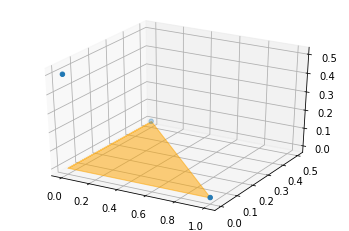

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.scatter([1,0,0],[0,0.5,0],[0,0,0.5])
ax.add_collection3d(plt.fill_between([1,0,0],[0,0.5,0],[0,0,0.5], color='orange', alpha=0.3,label="filled plot"))